In [ ]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [18]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    number3:int
    operation2:str
    number4:int
    finalNumber:int
    finalNumber2:int

In [30]:
def adder1(state:AgentState) -> AgentState:
    '''Adds two numbers'''
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def adder2(state:AgentState) -> AgentState:
    '''Adds two numbers'''
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtractor1(state:AgentState) -> AgentState:
    '''Subtracts two numbers'''
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def subtractor2(state:AgentState) -> AgentState:
    '''Subtracts two numbers'''
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def router1(state:AgentState) -> AgentState:
    op  = state['operation']
    if op == '-':
        return 'sub_op'
    elif op == '+':
        return 'add_op'

def router2(state:AgentState) -> AgentState:
    op  = state['operation2']
    if op == '-':
        return 'sub_op2'
    elif op == '+':
        return 'add_op2'

In [31]:
graph = StateGraph(AgentState)

graph.add_node('router', lambda state:state)
graph.add_node('add_node', adder1)
graph.add_node('subtract_node', subtractor1)

graph.add_node('router2', lambda state:state)
graph.add_node('add_node2', adder2)
graph.add_node('subtract_node2', subtractor2)

graph.add_edge(START, 'router')

graph.add_conditional_edges(
    'router',
    router1, 
    {
        'add_op': 'add_node',
        'sub_op': 'subtract_node'
    }
)

graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')

graph.add_conditional_edges(
    'router2',
    router2,
    {
        'add_op2': 'add_node2',
        'sub_op2': 'subtract_node2'

    }
)

graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)
app = graph.compile()

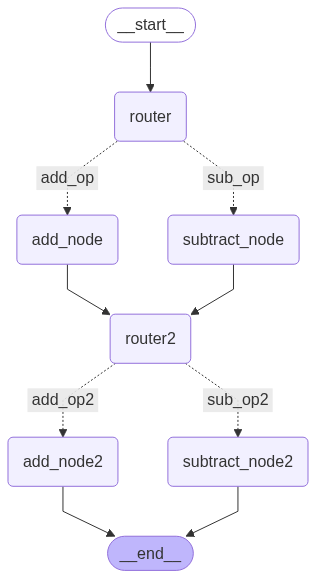

In [21]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
inp = AgentState(number1=10, operation='-', number2=5, number3=7, number4=2, operation2="+")
result = app.invoke(inp)
(result['finalNumber'], result['finalNumber2'])

(5, 9)